In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [26]:
%matplotlib inline
plt.style.use('ggplot') 

In [27]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [28]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

In [29]:
# Get length of stay from the icustays table
query = \
"""
select l.subject_id, count(distinct(charttime)) as lab_time_count
from mimiciii.labevents l
group by l.subject_id
order by subject_id
"""

data = pd.read_sql_query(query,con)

In [30]:
# Display the first few rows of the data
data.head(150)

,subject_id,lab_time_count
0,2,3
1,3,138
2,4,88
3,5,1
4,6,81
5,7,2
6,8,4
7,9,35
8,10,6
9,11,38


In [31]:
# Get length of stay from the icustays table
query = \
"""
select los
from mimiciii.icustays i 
order by subject_id
"""

data['los'] = pd.read_sql_query(query,con)
data.head(150)

,subject_id,lab_time_count,los
0,2,3,0.0918
1,3,138,6.0646
2,4,88,1.6785
3,5,1,0.0844
4,6,81,3.6729
5,7,2,0.2677
6,8,4,0.7391
7,9,35,1.0755
8,10,6,5.3231
9,11,38,8.0921


In [40]:
data_copy = data.copy()
data_copy['avg_test_per_day'] = data_copy['lab_time_count'] / data_copy['los']
mask = data_copy.los < 1
data_copy.loc[mask, 'avg_test_per_day'] = data_copy['los']
#data_copy['avg_test_per_day'].where(data_copy['los'] < 1, data_copy['lab_time_count']).apply()

data_copy.head(150)

,subject_id,lab_time_count,los,avg_test_per_day
0,2,3,0.0918,0.091800
1,3,138,6.0646,22.755004
2,4,88,1.6785,52.427763
3,5,1,0.0844,0.084400
4,6,81,3.6729,22.053418
5,7,2,0.2677,0.267700
6,8,4,0.7391,0.739100
7,9,35,1.0755,32.543003
8,10,6,5.3231,1.127163
9,11,38,8.0921,4.695938


In [33]:
Total = sum(data.lab_time_count)
print Total

2044412


In [34]:
data['lab_time_count'].mean()

44.201591282539134

In [35]:
data['lab_time_count'].median()

23.0

In [36]:
data['lab_time_count'].quantile([.1, .25, .5, .75, .9])

0.10      3.00
0.25      9.00
0.50     23.00
0.75     50.25
0.90    105.00
Name: lab_time_count, dtype: float64

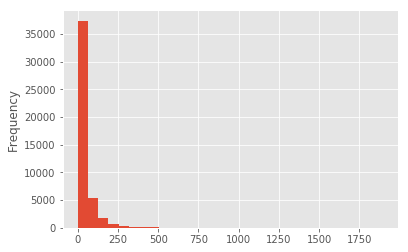

In [37]:
data['lab_time_count'].plot(kind='hist', bins = 30)